<a href="https://colab.research.google.com/github/linkwine/machine-learning/blob/master/customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Prediction

![churn](http://blog.idomoo.com/hs-fs/hubfs/Blog_graphics/shutterstock_245661022.jpg?width=1064&name=shutterstock_245661022.jpg)



Data source: https://www.kaggle.com/c/customer-churn-prediction/data

Data description:
1. number vmail messages

2. total day minutes

3. total day calls

4. total day charge

5. total eve minutes

6. total eve calls

7. total eve charge

8. total night minutes

9. total night calls

10. total night charge

11. total intl minutes

12. total intl calls

13. total intl charge

14. number customer service calls

label: True/False

# 1. Ingest

In [0]:
# load liabrary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# import data from github
train = pd.read_csv("https://raw.githubusercontent.com/linkwine/machine-learning/master/churn_train.txt")
test = pd.read_csv("https://raw.githubusercontent.com/linkwine/machine-learning/master/churn_test.txt")

In [0]:
# view data info

train.info()
print("---------------")
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3333 entries, KS to TN
Data columns (total 20 columns):
st              3333 non-null int64
 acclen         3333 non-null int64
 arcode         3333 non-null object
 phnum          3333 non-null object
 intplan        3333 non-null object
 voice          3333 non-null int64
nummailmes      3333 non-null float64
 tdmin          3333 non-null int64
 tdcal          3333 non-null float64
 tdchar         3333 non-null float64
 temin          3333 non-null int64
 tecal          3333 non-null float64
 tecahr         3333 non-null float64
 tnmin          3333 non-null int64
 tn cal         3333 non-null float64
 tnchar         3333 non-null float64
 timin          3333 non-null int64
 tical          3333 non-null float64
 tichar ncsc    3333 non-null int64
 label          3333 non-null object
dtypes: float64(8), int64(8), object(4)
memory usage: 546.8+ KB
---------------
<class 'pandas.core.frame.DataFrame'>
Index: 1667 entries, HI to VT
Data column

In [0]:
train.head()

,st,acclen,arcode,phnum,intplan,voice,nummailmes,tdmin,tdcal,tdchar,temin,tecal,tecahr,tnmin,tn cal,tnchar,timin,tical,tichar ncsc,label
KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [3]:
train[' label'].unique()

array([' False.', ' True.'], dtype=object)

In [0]:
full = pd.concat([train, test])

# 2. EDA

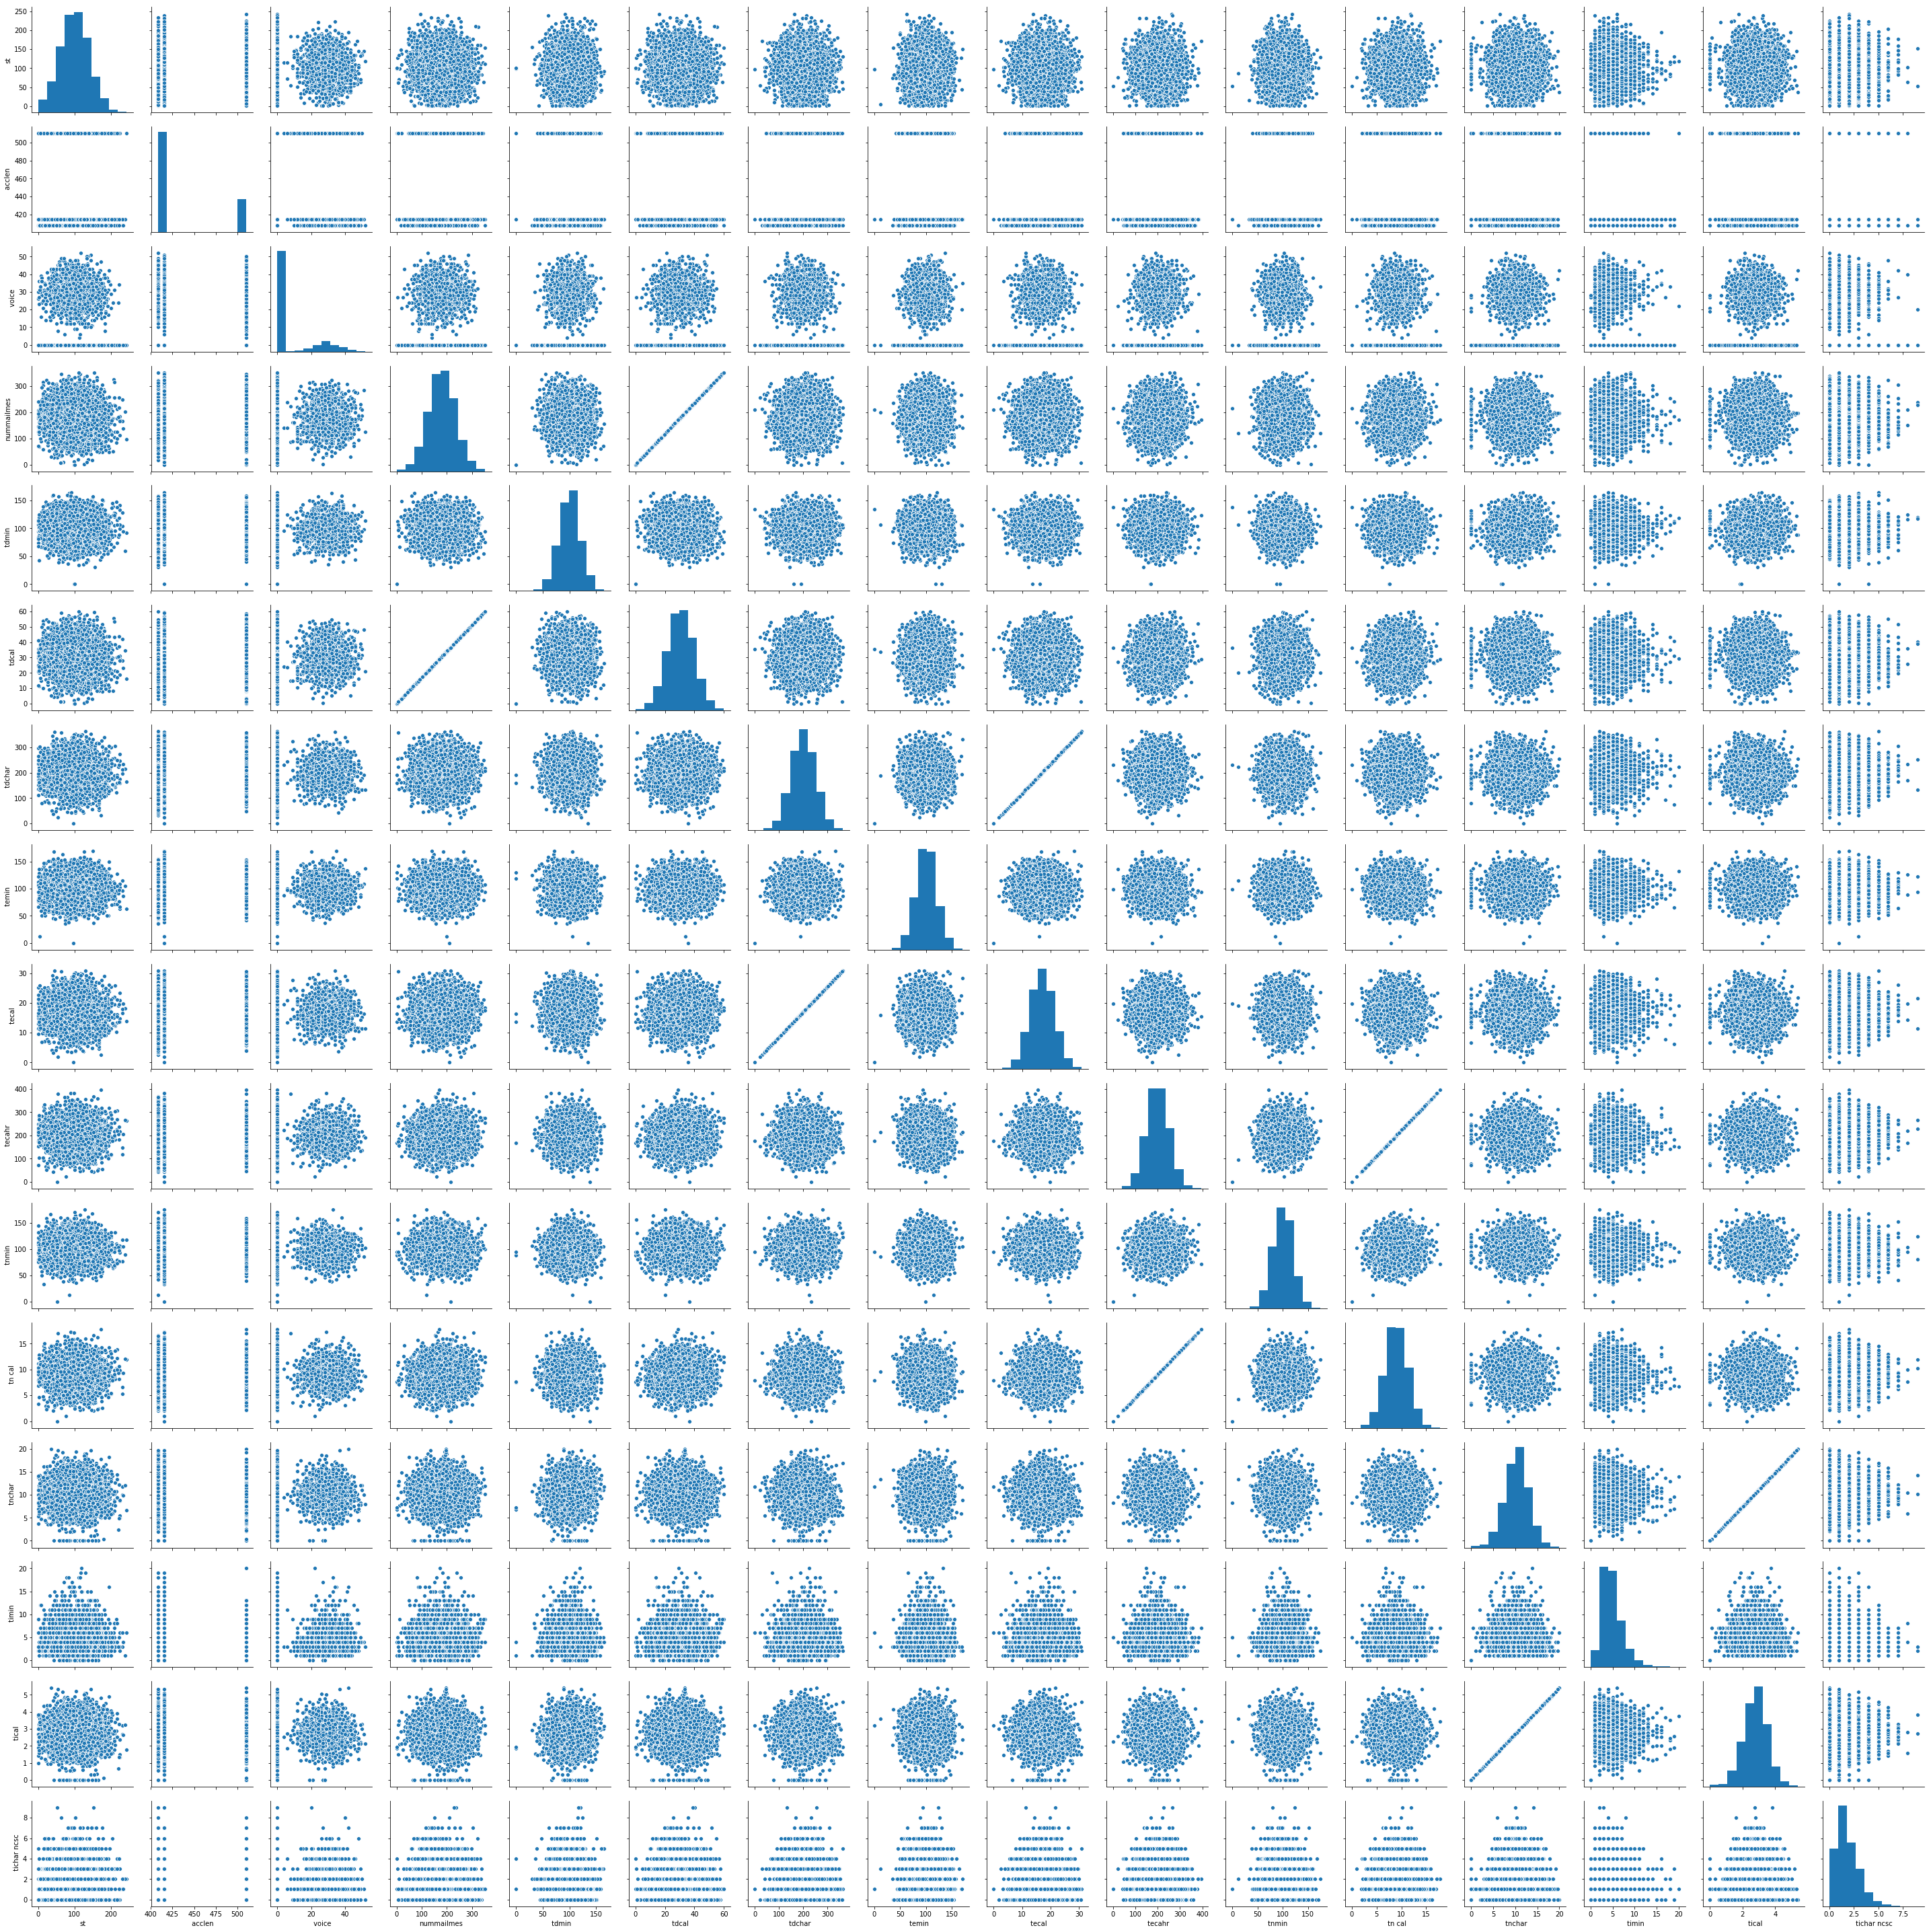

In [0]:
sns.pairplot(full)

In [48]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, KS to VT
Data columns (total 20 columns):
st              5000 non-null int64
 acclen         5000 non-null int64
 arcode         5000 non-null object
 phnum          5000 non-null int64
 intplan        5000 non-null int64
 voice          5000 non-null int64
nummailmes      5000 non-null float64
 tdmin          5000 non-null int64
 tdcal          5000 non-null float64
 tdchar         5000 non-null float64
 temin          5000 non-null int64
 tecal          5000 non-null float64
 tecahr         5000 non-null float64
 tnmin          5000 non-null int64
 tn cal         5000 non-null float64
 tnchar         5000 non-null float64
 timin          5000 non-null int64
 tical          5000 non-null float64
 tichar ncsc    5000 non-null int64
 label          5000 non-null int64
dtypes: float64(8), int64(11), object(1)
memory usage: 820.3+ KB


(array([4293.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         707.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

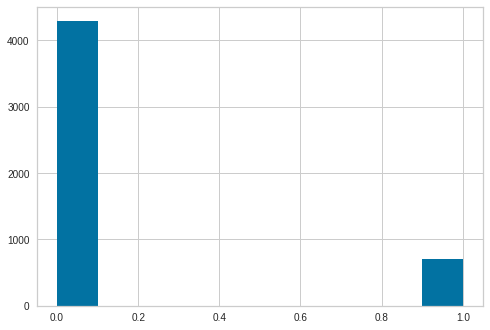

In [55]:
plt.hist(x= ' label', data= full)

# 4000+ non-churn, 500+ churn

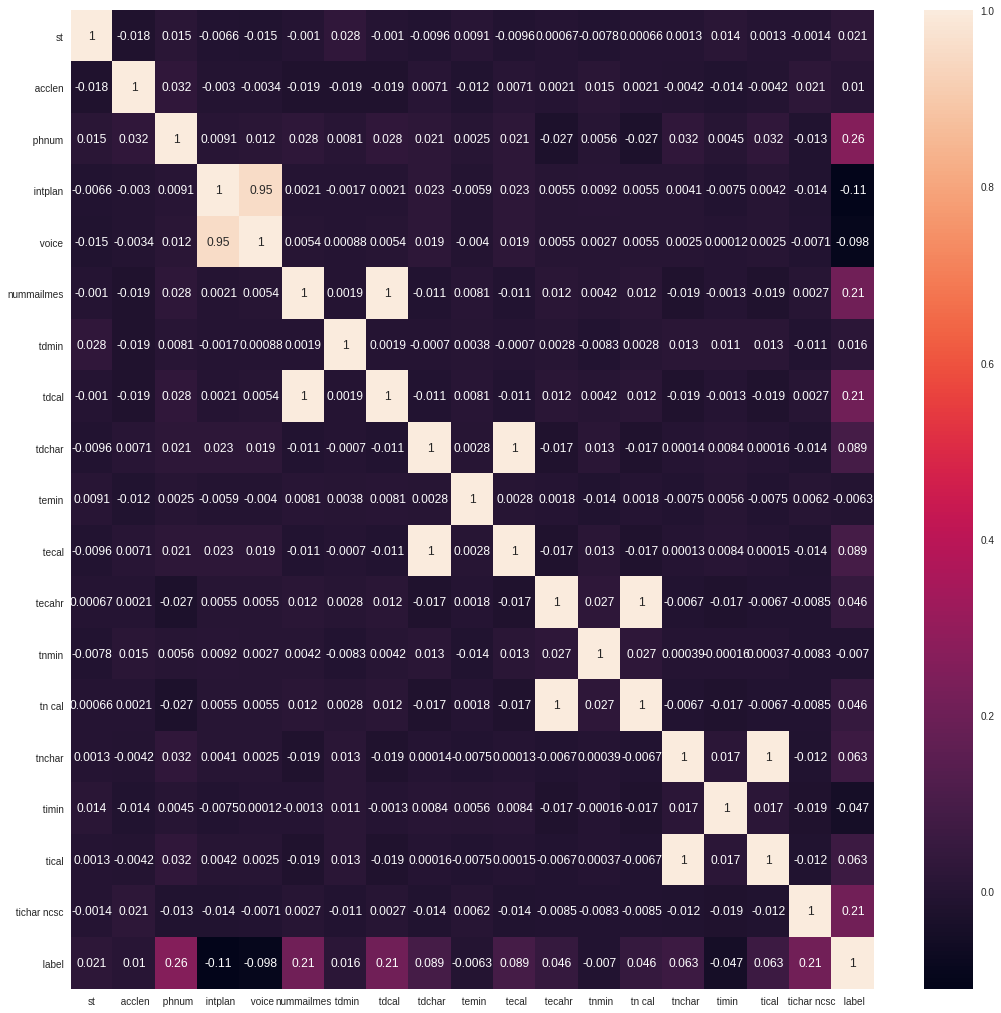

In [58]:
plt.figure(figsize=(18,18))
sns.heatmap(full.corr(), annot=True)

# 3. Preprocessing

In [9]:
train.columns

Index(['st', ' acclen', ' arcode', ' phnum', ' intplan', ' voice',
       'nummailmes', ' tdmin', ' tdcal', ' tdchar', ' temin', ' tecal',
       ' tecahr', ' tnmin', ' tn cal', ' tnchar', ' timin', ' tical',
       ' tichar ncsc', ' label'],
      dtype='object')

In [0]:
#encoding

for dataset in full_data: 
  dataset[' phnum'] = dataset[' phnum'].map({" no":0, " yes":1}).astype('int')
  dataset[' intplan'] = dataset[' intplan'].map({" no":0, " yes":1}).astype('int')
  dataset[' label'] = dataset[' label'].map({" False.":0, " True.":1}).astype('int')

In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X =  pd.DataFrame(sc.fit_transform(train.drop([' arcode',' label'],axis = 1)),
                  columns = ['st', ' acclen', ' phnum', ' intplan', ' voice',
       'nummailmes', ' tdmin', ' tdcal', ' tdchar', ' temin', ' tecal',
       ' tecahr', ' tnmin', ' tn cal', ' tnchar', ' timin', ' tical',
       ' tichar ncsc'])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [0]:
test[' phnum'] = test[' phnum'].map({" no":0, " yes":1}).astype('int')
test[' intplan'] = test[' intplan'].map({" no":0, " yes":1}).astype('int')
test[' label'] = test[' label'].map({" False.":0, " True.":1}).astype('int')

In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_test =  pd.DataFrame(sc.fit_transform(test.drop([' arcode',' label'],axis = 1)),
                  columns = ['st', ' acclen', ' phnum', ' intplan', ' voice',
       'nummailmes', ' tdmin', ' tdcal', ' tdchar', ' temin', ' tecal',
       ' tecahr', ' tnmin', ' tn cal', ' tnchar', ' timin', ' tical',
       ' tichar ncsc'])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [0]:
y = train[' label']
y_test = test[' label']

Text(0.5, 1.0, 'Explained Variance')

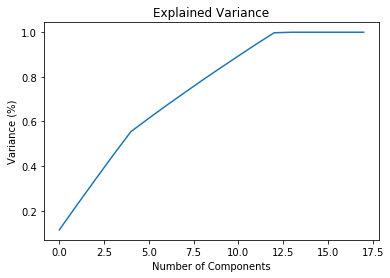

In [13]:
from sklearn.decomposition import PCA

#Fitting the PCA algorithm with our Data
pca = PCA().fit(X)

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')

# 4. Modeling

In [0]:
# dimension reduction - retain 10 components
pca = PCA(n_components = 10)
principal_component = pca.fit_transform(X)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver='lbfgs', multi_class='ovr')
lr.fit(X,y)
prediction_lr=lr.predict(X_test)

print('The accuracy of the Logistic Regression is', accuracy_score(prediction_lr,y_test))

The accuracy of the Logistic Regression is 0.871625674865027


In [18]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X,y)
prediction_rfc=rfc.predict(X_test)

print('The accuracy of the Random Forest is', accuracy_score(prediction_rfc,y_test))

The accuracy of the Random Forest is 0.9634073185362927


In [19]:
from sklearn import svm

svc=svm.SVC(gamma='scale')
svc.fit(X,y)
prediction_svc=svc.predict(X_test)

print('The accuracy of the SVC is', accuracy_score(prediction_svc,y_test))

The accuracy of the SVC is 0.9250149970005999


## Grid  Search 

In [23]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators': [100,200, 300, 400],'max_depth' :[2,3,4,5, 6, 7, 8, 9, 10]}
RF = RandomForestClassifier()

clf_RF = GridSearchCV(RF, parameters, cv=5)
clf_RF.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100, 200, 300, 400], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [24]:
clf_RF.best_params_

{'max_depth': 10, 'n_estimators': 200}

In [29]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=200, max_depth=10)
RF.fit(X,y)
prediction_RF=RF.predict(X_test)
print('The accuracy of the Random Forest Regression is', accuracy_score(prediction_RF,y_test))

The accuracy of the Random Forest Regression is 0.9628074385122976


In [31]:
from sklearn.model_selection import GridSearchCV
parameters = { 'C':[0.1, 1, 10,100]}
SVC = svm.SVC(kernel='rbf', gamma='scale')

clf_SVC = GridSearchCV(SVC, parameters, cv=5)
clf_SVC.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [32]:
clf_SVC.best_params_

{'C': 10}

In [34]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
SVC=svm.SVC(C = 10, kernel='rbf', gamma ='scale')
SVC.fit(X,y)
prediction_SVC=SVC.predict(X_test)
print('The accuracy of the SVC is',accuracy_score(prediction_SVC,y_test))

The accuracy of the SVC is 0.9334133173365327


# 5. Model Evaluation

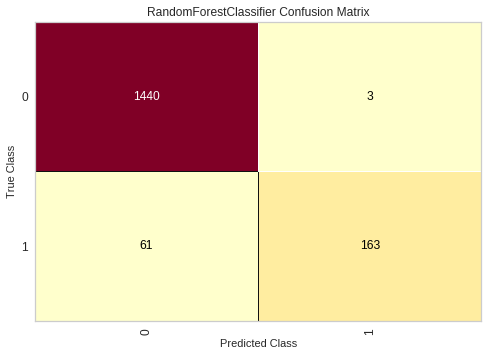

In [35]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(RF)
cm.fit(X, y)
cm.score(X_test, y_test)
cm.poof()

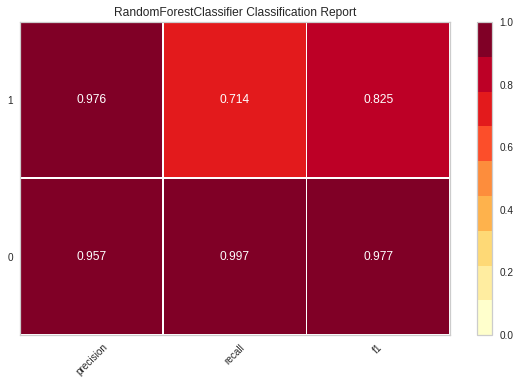

In [36]:
from yellowbrick.classifier import ClassificationReport
viz = ClassificationReport(RF)
viz.fit(X, y)
viz.score(X_test, y_test)
viz.poof()

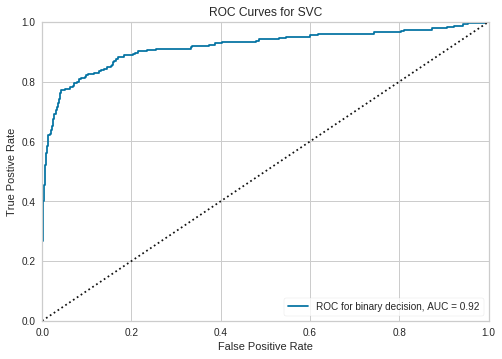

In [42]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(SVC, micro=False, macro=False, per_class=False)
visualizer.fit(X, y) 
visualizer.score(X_test, y_test)
visualizer.poof()  

# 6. AutoML

In [0]:
# install H2O
! pip install h2o

     |████████████████████████████████| 121.8MB 219kB/s 
  Stored in directory: /root/.cache/pip/wheels/36/73/57/2ea67a8a35ea9114f7d66cc8c5ec46c915698c909321f8a17d
Successfully built h2o


In [0]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.2" 2019-01-15; OpenJDK Runtime Environment (build 11.0.2+9-Ubuntu-3ubuntu118.04.3); OpenJDK 64-Bit Server VM (build 11.0.2+9-Ubuntu-3ubuntu118.04.3, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpqhm3bn6i
  JVM stdout: /tmp/tmpqhm3bn6i/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpqhm3bn6i/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.3
H2O cluster version age:,8 days
H2O cluster name:,H2O_from_python_unknownUser_rselbw
H2O cluster total nodes:,1
H2O cluster free memory:,3 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"


In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os;os.listdir("/content/gdrive/My Drive/ApplicationDomainHW")

['paper1.gdoc',
 'paper2.gdoc',
 'paper3.gdoc',
 'paper4.gdoc',
 'Machine Learning Canvas Template.docx',
 'short paper 5.gdoc',
 'short paper 6.gdoc',
 'Individual_project.gdoc',
 'processed.cleveland.data',
 'example_feature_types.ipynb',
 'paper_7.gdoc',
 'Machine Learning Canvas Template.gdoc',
 'heart_disease_prediction.ipynb',
 'paper_8.gdoc',
 'individual3.gdoc',
 'short_paper_9.gdoc',
 'customer_churn_prediction.ipynb',
 'churn_train.txt',
 'churn_test.txt']

In [0]:
df_train = h2o.import_file("/content/gdrive/My Drive/ApplicationDomainHW/churn_train.txt", destination_frame="df_train")
df_test = h2o.import_file("/content/gdrive/My Drive/ApplicationDomainHW/churn_test.txt", destination_frame="df_test")


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [0]:
x = df_train.columns[:-1]
y = df_train.columns[-1]

In [0]:
aml = H2OAutoML(max_models=25, seed=1)
aml.train(x=x, y=y, training_frame = df_train)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,mean_per_class_error,logloss,rmse,mse
StackedEnsemble_AllModels_AutoML_20190515_034546,0.536418,0.295022,0.292432,0.0855162
StackedEnsemble_BestOfFamily_AutoML_20190515_034546,0.552502,0.305834,0.298864,0.0893196
XGBoost_1_AutoML_20190515_034546,0.585558,0.348833,0.317744,0.100961
DeepLearning_1_AutoML_20190515_034546,0.59041,0.612465,0.376752,0.141942
XGBoost_grid_1_AutoML_20190515_034546_model_6,0.591652,0.369268,0.324801,0.105496
XGBoost_grid_1_AutoML_20190515_034546_model_4,0.602999,0.364735,0.324729,0.105449
XGBoost_grid_1_AutoML_20190515_034546_model_2,0.603361,0.385398,0.334144,0.111652
XGBoost_3_AutoML_20190515_034546,0.605748,0.448141,0.365163,0.133344
XGBoost_2_AutoML_20190515_034546,0.60783,0.412205,0.349849,0.122394
XGBoost_grid_1_AutoML_20190515_034546_model_3,0.609655,0.392165,0.336049,0.112929


In [0]:
# The leader model is stored here
aml.leader

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_AutoML_20190515_034546
No model summary for this model


ModelMetricsMultinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.14517096580683864
RMSE: 0.3810130782622017

ModelMetricsMultinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.08551619644096563
RMSE: 0.29243152436248326


In [0]:
# make predictions directly on the `"H2OAutoML"` object, or on the leader model object directly
preds = aml.predict(df_test)

stackedensemble prediction progress: |████████████████████████████████████| 100%


/usr/local/lib/python3.6/dist-packages/h2o/job.py:69: UserWarning: Test/Validation dataset column 'C8' has levels not trained on: [100.2,, 101.5,, 101.8,, 102.2,, 102.4,, 102.5,, 102.9,, 103.6,, 103.9,, 104.2,, 108.1,, 108.2,, 110.2,, 110.8,, 111.3,, 112.1,, 112.3,, 112.5,, 112.9,, 114.5,, 114.6,, 114.9,, 116.5,, 117.2,, 118.3,, 119.8,, 119.9,, 120,, 120.1,, 120.6,, 121.3,, 121.4,, 121.9,, 123.6,, 126.4,, 126.5,, 127.5,, 127.6,, 128.9,, 129.8,, 130.4,, 131,, 131.3,, 132.2,, 132.3,, 134.6,, 135.5,, 135.6,, 136,, 136.5,, 136.9,, 138.2,, 140.3,, 140.9,, 142.7,, 144.7,, 147.3,, 147.4,, 147.6,, 148,, 149.1,, 151.2,, 155.6,, 155.8,, 156.3,, 158.2,, 158.3,, 158.5,, 162.5,, 162.9,, 165.2,, 167,, 167.2,, 168.1,, 168.5,, 168.7,, 170,, 170.3,, 171,, 172.6,, 173.3,, 174.2,, 176.5,, 177.8,, 179,, 179.6,, 181,, 181.7,, 182.4,, 183.7,, 188.3,, 188.7,, 189.9,, 194.7,, 195.2,, 195.8,, 196.9,, 199.7,, 200.5,, 200.8,, 204.1,, 206.8,, 208.1,, 208.5,, 209.3,, 211.4,, 212.5,, 212.6,, 213.3,, 215.2,, 216.5,,

# 7. Conclusion